In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests
!pip3 install pandas
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
!pip3 install inltk
!pip3 install bnlp_toolkit
!pip3 install wordcloud
!pip3 install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

!git clone https://github.com/Foysal87/bn_nlp
!git clone https://github.com/banglakit/lemmatizer
!git clone https://github.com/sagorbrur/bnlp/blob/master/model/bn_pos.pkl

In [ ]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pprint import pprint
import bn_nlp

In [ ]:
from inltk.inltk import setup

setup('bn') 

#Bengali Corpus Generator

In [ ]:
beng_url = 'https://www.sangbadpratidin.in/world/sniffer-dog-receives-award-from-zelenskyy-on-diffusing-200-bombs/' 

In [ ]:
from bn_nlp.tokenizer import sentenceTokenizer
senttoken=sentenceTokenizer()

In [ ]:
from queue import Queue
from re import sub, split, M

q = Queue(maxsize = 0)

q.put(beng_url)

nsent = 0
bengcorpus = ""
visited = []
limit = 10000

while nsent <= limit: 
  length = q.qsize()
  if length > 0:

    url = q.get()
    if url not in visited:

      req = requests.get(url)
      content = req.content
      soup = BeautifulSoup(content, 'html5lib')

      for data_corpus in soup.find_all("div", class_="sp-single-post"):
        data = data_corpus.findChildren("p") #change this according to the corpus that i end up choosing 
        for i in data:
          next_p = i.get_text()
          sent = senttoken.basic_tokenizer(next_p) #tokenizing into sentences as well 
          if nsent <= limit:
            for j in sent:
              if 'Highlights' not in j:
                j = sub(r'[a-zA-Z0-9\—\@\(\)\-\’]', '', j)  #removing english things
                j = sub(r'^[\s\,\.\#\/\'\"\’\:\\\/\"\_]*$', '', j, flags=M) #removing sentences which have just random punctuation and whitespace
                if len(j) == 0: 
                  continue
                bengcorpus = bengcorpus + "\n" + j
                nsent = nsent + 1

      if nsent <= limit:
        data_corpus = soup.find_all('a') #add a condition so that only good links are appended so that it's cute to analyze the data later 
        for i in data_corpus:
          link = i.get('href')
          if link is not None:
            if 'https://www.sangbadpratidin.in/' in link: #ensuring that i keep getting links of the same kind cause otherwise my logic will just fail
                q.put(link)

      visited.append(url)

print(bengcorpus)


সংবাদ প্রতিদিন ডিজিটাল ডেস্ক: রাশিয়ার বিরুদ্ধে দাঁতে দাঁত চেপে লড়াই চালাচ্ছেন ইউক্রেনীয়রা  
 তবে শুধু মানুষ নয়, দেশরক্ষার কাজে অবদান রেখেছে একটি কুকুরও
 তার কাজের পুরস্কার হিসাবে দেশের প্রেসিডেন্ট ভলোদিমির জেলেনস্কির   হাত থেকে পুরস্কার পেয়েছে সে
 আড়াই বছর বয়সি এই কুকুরটির নাম প্যাট্রন
জানা গিয়েছে, রাশিয়া হামলা চালানোর পর থেকে প্রায় ২০০টি বিস্ফোরক উদ্ধার করেছে প্যাট্রন
 রাশিয়ার বিরুদ্ধে ইউক্রেনের রক্তক্ষয়ী সংগ্রামের প্রতীক হয়ে ওঠে সাদার উপর খয়েরি ছোপ রঙের মিষ্টি কুকুরটির এই কাজ
 প্যাট্রনের মালিকের নাম মাইহেইলো ইলিভ
 তিনি সেনাবাহিনীতে মেজর পদে নিযুক্ত রয়েছেন
 প্যাট্রনের সঙ্গে তিনিও পুরস্কৃত হয়েছেন
 রবিবার কানাডার প্রধানমন্ত্রী জাস্টিন ট্রুডো উপস্থিত ছিলেন পদক দেওয়ার অনুষ্ঠানে
অনুষ্ঠানের ভিডিওয় দেখা যাচ্ছে, সামনে দাঁড়িয়ে রয়েছেন কানাডা এবং ইউক্রেনের রাষ্ট্রপ্রধানরা
 নাম ঘোষণার পরে মালিকের সঙ্গে এগিয়ে আসছে প্যাট্রন  
 পদক নেওয়ার আগে লেজ নাড়তে থাকে প্যাট্রন
 কঠিন সময়ের মধ্যেও সেই দৃশ্য দেখে হাসি ফুটে ওঠে উপস্থিত সকলের মুখে
 এমনকী ট্রুডো পকেটে হাত দিয়ে খুঁজতে থাকেন, তাঁর কাছে প্যাট্রনকে দেও

In [ ]:
#writing the corpus to a text file 
with open('/content/bengaliCorpus.txt', 'w') as writefile:
    writefile.write(bengcorpus)

#Cleaning the Bengali Corpus

In [ ]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#got this from stackoverflow after i realized that my bengali corpus had quite a few emojis as well

In [ ]:
from re import sub, split, M

#reading the text
with open('/content/bengaliCorpus.txt', 'r') as f:
    lines = f.readlines()

#removing all punctuation from the corpus - i don't think i need to do any more cleaning 
cleancorp = ""
linesdone = 0

for line in lines:
  if linesdone <= 10500:
    line = sub(r'[\.\,\(\)\-\—\”\“\:\?\n\…\।\‘\_\–\#\¿\?\¡\í\!\\\/\á\[\]\;\&\ó\‘\|\⤵️\🤩\%\❤\♥]', ' ', line) #not removing the ' cause it might cause problems later during tokenization
    line = sub(r'^[\s]*$', '', line, flags=M)
    line = deEmojify(line)
    if len(line) == 0:
      continue
    print(line)
    if len(cleancorp) > 0:
      cleancorp = cleancorp +  "\n" + line
    else:
      cleancorp = line
    linesdone = linesdone + 1
  else:
    break

#put the obtained output in another text file 
with open('/content/bengaliCleanCorpus.txt', 'w') as writefile:
    writefile.write(cleancorp)

Streaming output truncated to the last 5000 lines.
 কেননা পুরুষ্ট শস্য এসেই তো পুষ্টি দেবে সভ্যতাকে 
 পৃথিবী তাই এই নিয়মেই ঘুরিয়ে চলেছে সময়ের কাঁটা 
 কিন্তু এই যে আমরা চামড়ার নিচে ঢুকিয়ে দিয়েছি উদাসীনতা  এই যে আমরা নির্লজ্জভাবে অতীতবিচ্ছিন্ন ও আত্মগোপনকারী  এ প্রবণতাই শঙ্কার 
 খেয়াল করলে দেখব  ওই চ্যাটে ভুয়ো নামে অস্তিত্বশীল হওয়ার মতোই ঘুরব বেড়াচ্ছে আমাদের মিছে সত্তা 
 আর কতদিন কাউকে চিঠি লিখছি না আমরা  কতদিন আদরের গন্ধে আঁকা হয়নি হরফ  কেমন আছো  অথচ উপায় যে নেই তা তো নয় 
 তবু কতদিন আমরা চেপে বসিনি মন্থর ট্রামে 
 কতদিন বাসস্টপে দাঁড়ানো কাউকে জিজ্ঞেস করিনি  কটা বাজে  এই ট্রামঘড়িচিঠিও একদিন হয়তো চলে যাবে 
 আর যন্ত্রণার রক্ত বুকে চেপে আমরা ছটফটিয়ে মরব সভ্যতার উপহার ঠান্ডা শপিংমলে 
 তবু কতদিন কেটে যাবে  রাস্তায় নেমে কাউকে হাত ধরিয়ে ক্রসিং পের করিয়ে দেব না আমরা 
 কতদিন পেরবে  অচেনা কারওর সঙ্গে গল্প করতে করতে আমরা বলে ফেলব না  আসুন না একটু চা খাই 
 একদিন সবই চলে যাবে 
 আর সেই সব হারানোর ভিতর জেগে থাকবে আমাদের ভারচুয়াল আমি 
 আমাদের আদরের ডাকনামকে ভেংচি কেটে বিদ্রুপ করে যাবে  আমাদেরই ডিজিটাল সি

#Word Tokenization

In [ ]:
from bn_nlp.tokenizer import wordTokenizer
wordtoken=wordTokenizer()

with open('/content/bengaliCleanCorpus.txt', 'r') as f:
    lines = f.readlines()

wordlistbeng = []
linenum = 0

for line in lines:
  linenum += 1
  print(linenum)
  tokens = wordtoken.basic_tokenizer(line)
  for word in tokens:
    wordlistbeng.append(word)

### Finding word frequency

In [ ]:
from collections import Counter

wordcountbeng = Counter(wordlistbeng)
print(wordcountbeng.most_common(30))

[('এই', 998), ('করে', 882), ('না', 864), ('থেকে', 777), ('ও', 539), ('হয়', 536), ('হয়েছে', 533), ('করা', 511), ('হবে', 465), ('সেই', 401), ('কিন্তু', 396), ('নিয়ে', 393), ('সঙ্গে', 379), ('আর', 351), ('জন্য', 345), ('করতে', 336), ('তিনি', 330), ('তা', 325), ('যে', 323), ('তবে', 315), ('এবং', 314), ('হয়ে', 303), ('বলে', 295), ('যায়', 282), ('মধ্যে', 277), ('এক', 277), ('কোনও', 265), ('তাঁর', 261), ('দেওয়া', 254), ('একটি', 248)]


### Plotting the most frequent words

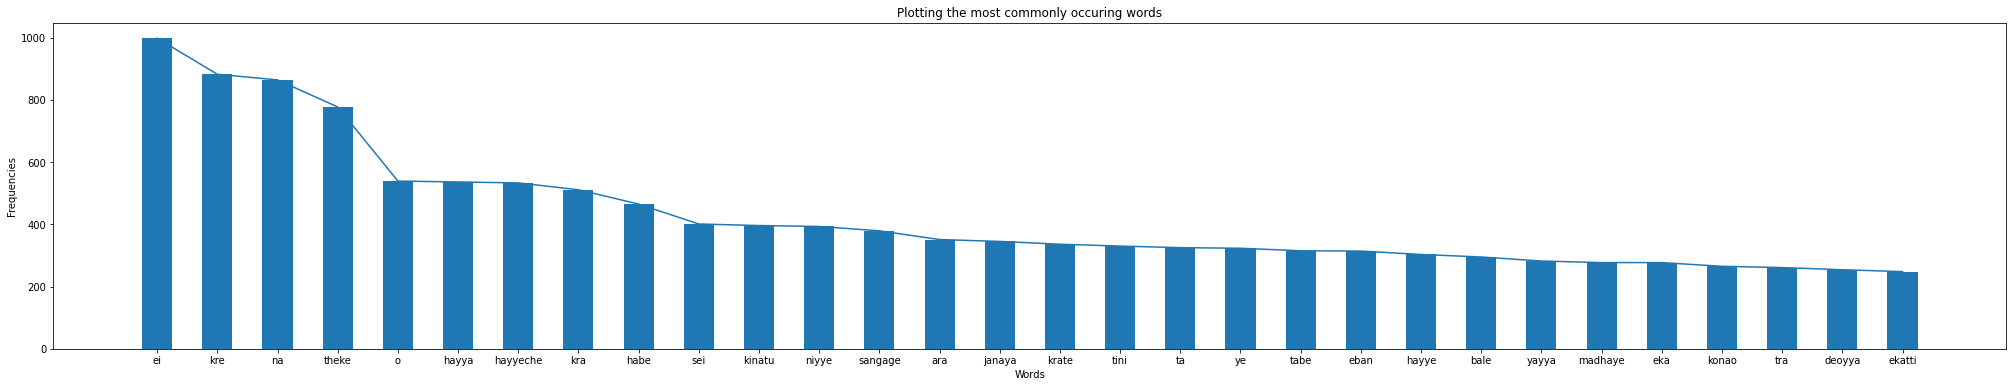

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengalicommonwords = []
bengalicommonwordfreq = []

for thing in wordcountbeng.most_common(30):
  bengalicommonwords.append(bp.bn2enCon(thing[0]))
  bengalicommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(35,6))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words")
plt.bar(bengalicommonwords, bengalicommonwordfreq, width=0.5)
plt.plot(bengalicommonwords,bengalicommonwordfreq)
plt.show()

#Sentence Tokenization

In [ ]:
from re import sub, split, M

with open('/content/bengaliCorpus.txt', 'r') as f:
    lines = f.readlines()

bengsent = []
bengcleansent = []

for line in lines:
  bengsent.append(line)
  line = sub(r'[\.\,\(\)\-\—\”\“\:\?\n\…\।\_\–\#\¿\?\¡\í\!\\\/\á\[\]\;\'\‘]', ' ', line)
  bengcleansent.append(line)

#Removing Stopwords

In [ ]:
from bn_nlp.preprocessing import ban_processing
from bn_nlp.tokenizer import wordTokenizer

bp=ban_processing()
wordtoken=wordTokenizer()

nostopbeng = []

for line in bengcleansent:
  wordy = bp.stop_word_remove(line)
  tokens = wordtoken.basic_tokenizer(wordy)
  for word in tokens:
    nostopbeng.append(word)

### Printing frequency of words without the stop words 

In [ ]:
from collections import Counter

wordcountbeng = Counter(nostopbeng)
print(wordcountbeng.most_common(30))

[('এক', 277), ('সংবাদ', 233), ('প্রতিদিন', 230), ('ডিজিটাল', 226), ('শুরু', 224), ('কথা', 222), ('ডেস্ক', 213), ('গত', 206), ('বেশি', 190), ('নতুন', 180), ('সময়', 170), ('করোনা', 166), ('হাজার', 163), ('তৈরি', 162), ('কাজ', 161), ('দেশে', 152), ('দাবি', 152), ('টাকা', 143), ('অভিযোগ', 138), ('মনে', 135), ('বছর', 130), ('ভাল', 128), ('বিরুদ্ধে', 127), ('একটা', 126), ('খবর', 117), ('দেশের', 112), ('শেষ', 111), ('জানিয়েছেন', 111), ('দুই', 111), ('লক্ষ', 111)]


### Plotting the most frequent words without the stop words 

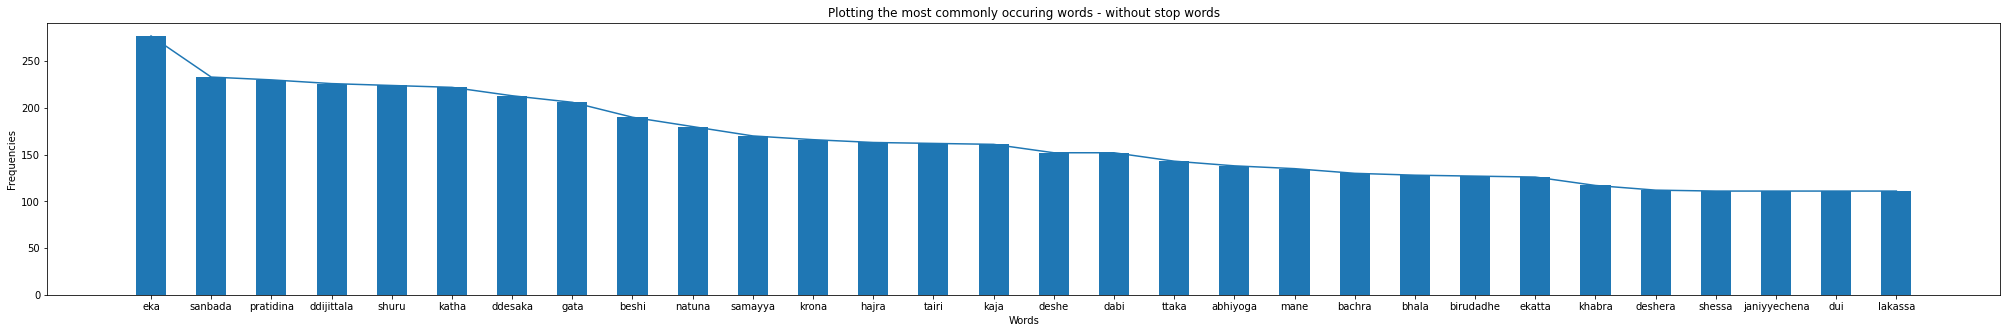

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengalicommonwords = []
bengalicommonwordfreq = []

for thing in wordcountbeng.most_common(30):
  bengalicommonwords.append(bp.bn2enCon(thing[0]))
  bengalicommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(35,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words - without stop words")
plt.bar(bengalicommonwords, bengalicommonwordfreq, width=0.5)
plt.plot(bengalicommonwords,bengalicommonwordfreq)
plt.show()

#POS Tagging

In [ ]:
from bnlp import POS
bn_pos = POS()

model_path = "/content/bn_pos.pkl"

bengalitagged = []

for text in bengcleansent: #this one has stopwords 
  res = bn_pos.tag(model_path, text)

  for thing in res:
    print(thing)
    bengalitagged.append(thing)

Streaming output truncated to the last 5000 lines.
('এক', 'JQ')
('রোবট', 'NC')
('তৈরি', 'NC')
('করা', 'NV')
('হয়েছে', 'VM')
('যা', 'PRL')
('মানুষের', 'NC')
('শেষকৃত্যের', 'NC')
('অনুষ্ঠান', 'NC')
('সম্পন্ন', 'NC')
('করবে', 'VM')
('হাক্কানি', 'NC')
('নেটওয়ার্ক', 'NC')
('গুঁড়িয়ে', 'VM')
('দিতে', 'VAUX')
('পাকিস্তানে', 'NP')
('মার্কিন', 'NP')
('ড্রোন', 'NP')
('হামলা', 'NP')
('মানুষের', 'NC')
('সঙ্গী', 'NC')
('রোবট', 'NC')
('বহুকাল', 'NC')
('আগে', 'NST')
('থেকেই', 'PP')
('হয়েছে', 'VM')
('অনেকেই', 'PPR')
('অফিস', 'NC')
('বাড়ির', 'NC')
('কাজের', 'NC')
('জন্য', 'PP')
('হিউম্যানয়েড', 'NC')
('রোবট', 'NC')
('ব্যবহার', 'NC')
('করে', 'VM')
('থাকেন', 'VAUX')
('আবার', 'AMN')
('যৌন', 'JJ')
('সঙ্গী', 'NC')
('হিসেবেও', 'PP')
('রোবটের', 'NC')
('বেশ', 'JQ')
('চাহিদা', 'NC')
('রয়েছে', 'VM')
('আন্তর্জাতিক', 'JJ')
('বাজারে', 'NC')
('এবারে', 'ALC')
('সেই', 'DAB')
('তালিকায়', 'NC')
('সংযোজন', 'NC')
('হয়', 'VM')
('সফটব্যাঙ্কের', 'NC')
('এই', 'DAB')
('নয়া', 'NC')
('হিউম্যানয়েড', 'JJ')
('রোবট', 'NC')
('পেপার', 

### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in bengalitagged:
  tags.append(thing[1])

tagcountbeng = Counter(tags)

print(tagcountbeng)

Counter({'NC': 46189, 'VM': 13565, 'JJ': 7311, 'NP': 4938, 'PPR': 4108, 'JQ': 3975, 'NV': 2994, 'PP': 2985, 'VAUX': 2469, 'DAB': 2033, 'CSB': 1896, 'RDF': 1667, 'NST': 1623, 'ALC': 1609, 'CCD': 1474, 'CX': 1315, 'AMN': 920, 'PU': 863, 'LC': 604, 'PRL': 440, 'CCL': 332, 'PWH': 311, 'PRF': 196, 'DRL': 185, 'RDX': 14, 'CIN': 13, 'LV': 2, 'RDS': 1})


### Plotting the 30 most common tags 

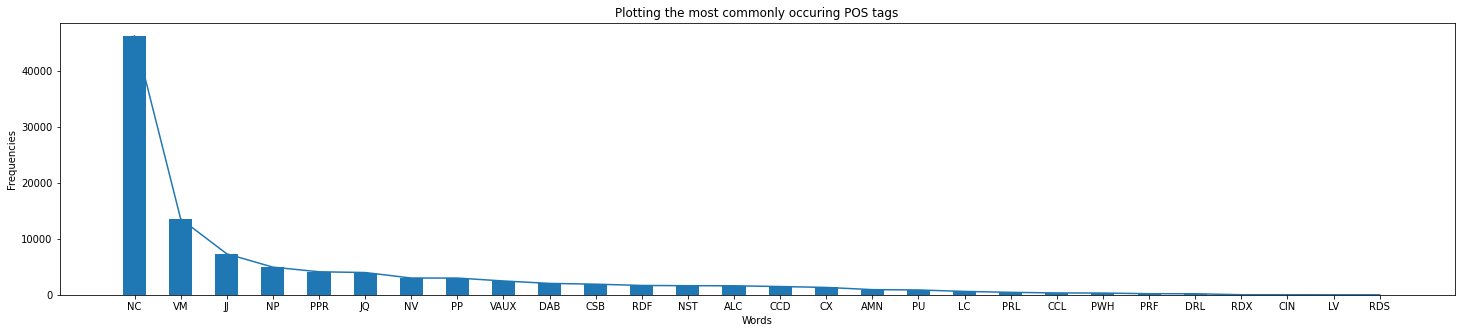

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcountbeng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

## Data without stopwords 

In [ ]:
from bnlp import POS
bn_pos = POS()

model_path = "/content/bn_pos.pkl"

bengalitagged1 = []

res = bn_pos.tag(model_path, nostopbeng)

for thing in res:
  print(thing)
  bengalitagged1.append(thing)

Streaming output truncated to the last 5000 lines.
('হাট', 'NC')
('চালু', 'NC')
('বিষয়টি', 'NC')
('দীর্ঘদিন', 'NC')
('প্রস্তাবটি', 'NC')
('অনিশ্চিত', 'JJ')
('দীর্ঘদিন', 'NC')
('বাস্তবায়িত', 'JJ')
('উপকৃত', 'JJ')
('ভারত', 'NP')
('বাংলাদেশের', 'NP')
('সীমান্তবর্তী', 'NP')
('বাসিন্দারা', 'NC')
('কিছুটা', 'JQ')
('চোরাচালানে', 'NC')
('রাশ', 'NC')
('পড়বে', 'VM')
('এমনটাই', 'PPR')
('আশাবাদী', 'JJ')
('সংশ্লিষ্ট', 'JJ')
('মহল', 'NC')
('অবশেষে', 'ALC')
('পশ্চিমবঙ্গের', 'NP')
('মালদহ', 'NP')
('বাংলাদেশের', 'NP')
('রাজশাহী', 'NP')
('জেলার', 'NC')
('জিরো', 'NC')
('পয়েন্টে', 'NC')
('চালু', 'NC')
('চলেছে', 'VM')
('আন্তর্জাতিক', 'JJ')
('সীমান্ত', 'NC')
('হাট', 'NC')
('ভারতবাংলাদেশ', 'NC')
('সীমান্তে', 'NC')
('পাঁচটি', 'JQ')
('হাট', 'NC')
('চালুর', 'NC')
('পরিকল্পনা', 'NC')
('দুদেশের', 'NC')
('প্রাথমিক', 'JJ')
('পর্যায়ের', 'NC')
('আলোচনা', 'NC')
('চূড়ান্ত', 'JJ')
('পাইলট', 'NC')
('প্রজেক্ট', 'NC')
('হিসেবে', 'PP')
('মালদহরাজশাহীর', 'NC')
('সীমান্ত', 'JJ')
('হাটটি', 'NC')
('চালু', 'NC')
('চলেছে', 'VM')


### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in bengalitagged1:
  tags.append(thing[1])

tagcountbeng = Counter(tags)

print(tagcountbeng)

Counter({'NC': 46209, 'JJ': 7326, 'VM': 5834, 'NP': 5007, 'JQ': 2276, 'RDF': 1669, 'NV': 946, 'VAUX': 808, 'PPR': 709, 'ALC': 618, 'AMN': 588, 'NST': 518, 'LC': 386, 'PP': 384, 'CCL': 155, 'CX': 98, 'DAB': 95, 'PRL': 83, 'CSB': 65, 'PRF': 31, 'PWH': 16, 'RDX': 14, 'DRL': 8, 'PU': 3, 'LV': 2})


### Plotting the 30 most common tags 

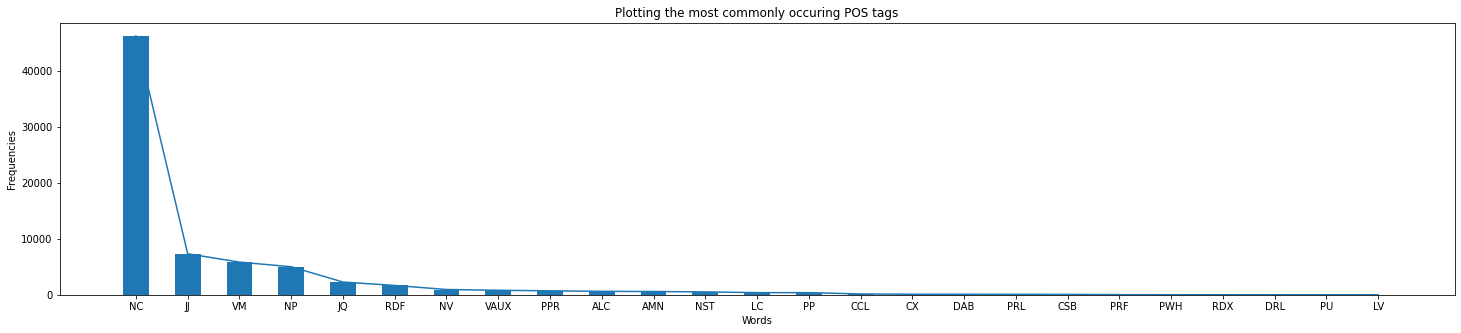

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcountbeng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

#Stemming

In [ ]:
from bn_nlp.Stemmer import stemmerOP

stemlist = []

stemmer=stemmerOP()
for word in nostopbeng:
  print(word, "->", stemmer.stem(word))
  stemlist.append(stemmer.stem(word))

### Finding the most common word stems

In [ ]:
from collections import Counter

stemcounteng = Counter(stemlist)
print(stemcounteng.most_common(30))

[('দেশ', 344), ('এক', 304), ('কথা', 302), ('রাজ্য', 256), ('শুরু', 254), ('বল', 237), ('করোন', 235), ('প্রতিদিন', 234), ('সংবাদ', 233), ('ডিজিটাল', 227), ('গত', 214), ('ডেস্ক', 213), ('কাজ', 213), ('মন', 200), ('সম', 192), ('বেশ', 190), ('টাক', 187), ('পড়', 184), ('নতুন', 180), ('নাম', 177), ('দিন', 174), ('হাজ', 166), ('দাবি', 164), ('পুলিশ', 163), ('বাড়ি', 162), ('তৈর', 162), ('অভিযোগ', 158), ('আস', 156), ('চল', 155), ('শেষ', 152)]


### Plotting the most common stems

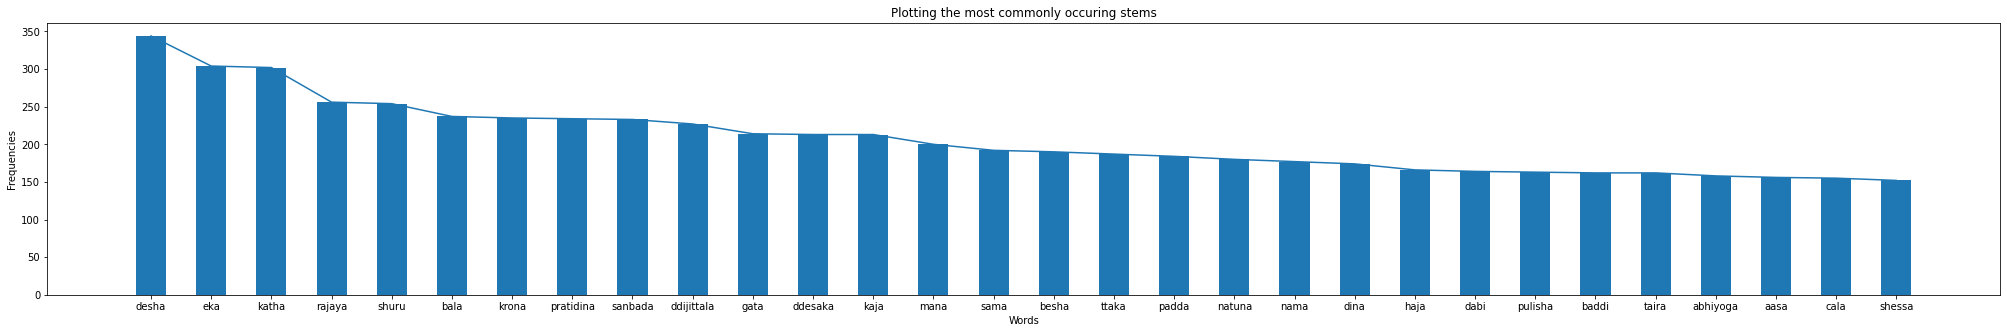

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

commonstems = []
commonstemfreq = []

for thing in stemcounteng.most_common(30):
  commonstems.append(bp.bn2enCon(thing[0]))
  commonstemfreq.append(thing[1])

fig = plt.figure(figsize=(35,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring stems")
plt.bar(commonstems, commonstemfreq, width=0.5)
plt.plot(commonstems,commonstemfreq)
plt.show()

#Lemmatization

In [ ]:
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

lemmatizer = BengaliLemmatizer()
lemmed = []

for word in nostopbeng:
  print(word,"->",lemmatizer.lemmatize(word))
  lemmed.append(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
হাট -> হাট
চালু -> চালু
বিষয়টি -> বিষয়টি
দীর্ঘদিন -> দীর্ঘদিন
প্রস্তাবটি -> প্রস্তাবটি
অনিশ্চিত -> অনিশ্চিত
দীর্ঘদিন -> দীর্ঘদিন
বাস্তবায়িত -> বাস্তবায়িত
উপকৃত -> উপকৃত
ভারত -> ভারত
বাংলাদেশের -> বাংলাদেশের
সীমান্তবর্তী -> সীমান্তবর্তী
বাসিন্দারা -> বাসিন্দারা
কিছুটা -> কিছুটা
চোরাচালানে -> চোরাচালানে
রাশ -> রাশ
পড়বে -> পড়
এমনটাই -> এমনটাই
আশাবাদী -> আশাবাদী
সংশ্লিষ্ট -> সংশ্লিষ্ট
মহল -> মহল
অবশেষে -> অবশেষে
পশ্চিমবঙ্গের -> পশ্চিমবঙ্গের
মালদহ -> মালদহ
বাংলাদেশের -> বাংলাদেশের
রাজশাহী -> রাজশাহী
জেলার -> জেলার
জিরো -> জিরো
পয়েন্টে -> পয়েন্টে
চালু -> চালু
চলেছে -> চলেছে
আন্তর্জাতিক -> আন্তর্জাতিক
সীমান্ত -> সীমান্ত
হাট -> হাট
ভারতবাংলাদেশ -> ভারতবাংলাদেশ
সীমান্তে -> সীমান্তে
পাঁচটি -> পাঁচটি
হাট -> হাট
চালুর -> চালুর
পরিকল্পনা -> পরিকল্পনা
দুদেশের -> দুদেশের
প্রাথমিক -> প্রাথমিক
পর্যায়ের -> পর্যায়ের
আলোচনা -> আলোচনা
চূড়ান্ত -> চূড়ান্ত
পাইলট -> পাইলট
প্রজেক্ট -> প্রজেক্ট
হিসেবে -> হিসেবে
মালদহরাজশাহীর -> মালদহরাজশাহীর
সীমান্ত -> সীমান্ত
হ

# Word Cloud Algorithm
---
Algorithm or Logic I have thought of for generating the word cloud:
- Having looked at the frequency graphs, I have reached the conclusion that for the word cloud I will be using a pretty simple logic or algorithm 
- I want to use the most commonly occuring words for the word cloud, however the catch is that I want to ensure it doesn't include stopwords or any word with apostrophe while also ensuring that they are mostly either common nouns, proper nouns or verbs 

### More information about the word cloud
---
#### The reason I just want to include the frequency as my importance factor:
- I feel like if I remove the stopwords or words with apostrophe marks and stopwords, the remaining words give a pretty comprehensive view of the main terms that help define the corpus I have selected
- Another thing I want to ensure is that the word included in the word cloud doesn't include words like also, like, etc and thus mainly focus on words which are either nouns or verbs or adjectives mostly
---
#### The reason I picked the 50 most frequent words:
- With the given data, I think the top 50 words would give a pretty comprehensive word cloud of the data without going into terms which are too niche to appear on it 
- A word cloud is sort of meant to give a brief overview of the kind of data we have and I feel like 50 words is a good place to keep it at to ensure that the data is well represented and not made too niche at the same time
- The top 50 words are also going to appear after the code block written below


### Making the required list

In [ ]:
from collections import Counter
from bn_nlp.posTag import postag

tagger=postag()
wordcountbeng = Counter(nostopbeng)

pos = []

length = len(wordcountbeng)

for thing in wordcountbeng.most_common(2000):
  possy = tagger.tag(thing[0])
  for possed in possy:
    pos.append(possed[1])

bengcommonwords = []
bengcommonwordfreq = []

index = 0
i = 0

for thing in wordcountbeng.most_common(2000):
  if 'noun' == pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 5)
    i += 1
  elif 'adjective' in pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 3)
    i += 1
  elif 'adverb' in pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 2)
    i += 1
  if 'verb' == pos[index]:
    bengcommonwords.append(thing[0])
    bengcommonwordfreq.append(thing[1] * 2.5)
    i += 1
  
  if i == 50:
    break
  index += 1

In [ ]:
n = len(bengcommonwords)

for i in range(n-1):
  for j in range(0, n-i-1):
    if bengcommonwordfreq[j] < bengcommonwordfreq[j + 1] :
            bengcommonwordfreq[j], bengcommonwordfreq[j + 1] = bengcommonwordfreq[j + 1], bengcommonwordfreq[j]
            bengcommonwords[j], bengcommonwords[j + 1] = bengcommonwords[j + 1], bengcommonwords[j]

### Plotting the data

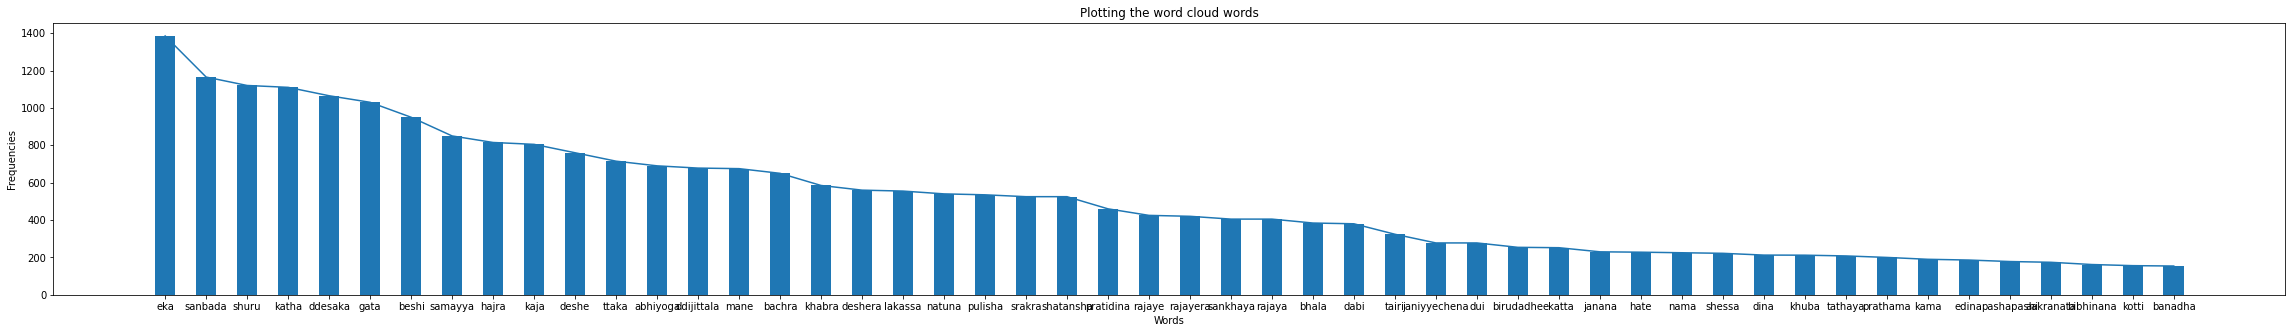

In [ ]:
from matplotlib import pyplot as plt
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

bengplot = []

for word in bengcommonwords:
  bengplot.append(bp.bn2enCon(word))

fig = plt.figure(figsize=(40,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the word cloud words")
plt.bar(bengplot, bengcommonwordfreq, width=0.5)
plt.plot(bengplot, bengcommonwordfreq)
plt.show()

### Printing the most common words that I obtained with the help of my algorithm

In [ ]:
for i in range(len(bengcommonwords)):
  print(bengcommonwords[i])

এক
সংবাদ
শুরু
কথা
ডেস্ক
গত
বেশি
সময়
হাজার
কাজ
দেশে
টাকা
অভিযোগ
ডিজিটাল
মনে
বছর
খবর
দেশের
লক্ষ
নতুন
পুলিশ
সরকার
শতাংশ
প্রতিদিন
রাজ্যে
রাজ্যের
সংখ্যা
রাজ্য
ভাল
দাবি
তৈরি
জানিয়েছেন
দুই
বিরুদ্ধে
একটা
জানান
হাতে
নাম
শেষ
দিন
খুব
তথ্য
প্রথম
কম
এদিন
পাশাপাশি
আক্রান্ত
বিভিন্ন
কোটি
বন্ধ


#Word Cloud Visualization 

In [ ]:
from bn_nlp.preprocessing import ban_processing
bp=ban_processing()

wcdict = {}

for i in range(len(bengcommonwords)):
  wcdict[bp.bn2enCon(bengcommonwords[i])] = bengcommonwordfreq[i]

print(wcdict)

{'eka': 1385, 'sanbada': 1165, 'shuru': 1120, 'katha': 1110, 'ddesaka': 1065, 'gata': 1030, 'beshi': 950, 'samayya': 850, 'hajra': 815, 'kaja': 805, 'deshe': 760, 'ttaka': 715, 'abhiyoga': 690, 'ddijittala': 678, 'mane': 675, 'bachra': 650, 'khabra': 585, 'deshera': 560, 'lakassa': 555, 'natuna': 540, 'pulisha': 535, 'srakra': 525, 'shatansha': 525, 'pratidina': 460, 'rajaye': 425, 'rajayera': 420, 'sankhaya': 405, 'rajaya': 405, 'bhala': 384, 'dabi': 380.0, 'tairi': 324, 'janiyyechena': 277.5, 'dui': 277.5, 'birudadhe': 254, 'ekatta': 252, 'janana': 230.0, 'hate': 228, 'nama': 225.0, 'shessa': 222, 'dina': 212.5, 'khuba': 212, 'tathaya': 208, 'prathama': 200, 'kama': 190.0, 'edina': 186, 'pashapashi': 178, 'aakranata': 174, 'bibhinana': 162, 'kotti': 156, 'banadha': 154}


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black', width = 500, height=500, margin=2)

In [ ]:
wc.fit_words(wcdict)
wc.to_file('wc.png')

# Final Word Cloud that was generated
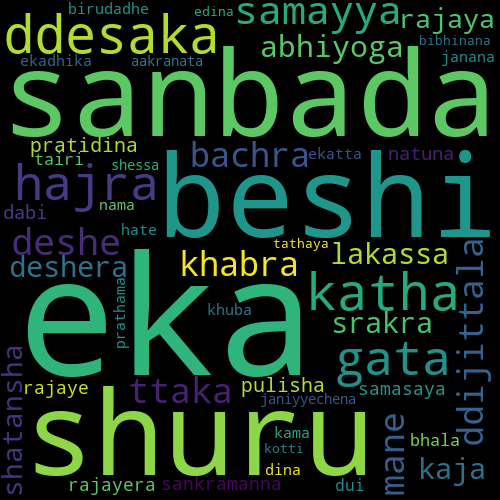

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2022-05-12 17:40:54--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.3’

kalpurush.ttf.3     100%[===================>] 307.22K   495KB/s    in 0.6s    

2022-05-12 17:40:55 (495 KB/s) - ‘kalpurush.ttf.3’ saved [314592/314592]



In [ ]:
wcdict = {}

for i in range(len(bengcommonwords)):
  wordy = bengcommonwords[i]
  wcdict[wordy] = bengcommonwordfreq[i]

print(wcdict)

{'এক': 1385, 'সংবাদ': 1165, 'শুরু': 1120, 'কথা': 1110, 'ডেস্ক': 1065, 'গত': 1030, 'বেশি': 950, 'সময়': 850, 'হাজার': 815, 'কাজ': 805, 'দেশে': 760, 'টাকা': 715, 'অভিযোগ': 690, 'ডিজিটাল': 678, 'মনে': 675, 'বছর': 650, 'খবর': 585, 'দেশের': 560, 'লক্ষ': 555, 'নতুন': 540, 'পুলিশ': 535, 'সরকার': 525, 'শতাংশ': 525, 'প্রতিদিন': 460, 'রাজ্যে': 425, 'রাজ্যের': 420, 'সংখ্যা': 405, 'রাজ্য': 405, 'ভাল': 384, 'দাবি': 380.0, 'তৈরি': 324, 'জানিয়েছেন': 277.5, 'দুই': 277.5, 'বিরুদ্ধে': 254, 'একটা': 252, 'জানান': 230.0, 'হাতে': 228, 'নাম': 225.0, 'শেষ': 222, 'দিন': 212.5, 'খুব': 212, 'তথ্য': 208, 'প্রথম': 200, 'কম': 190.0, 'এদিন': 186, 'পাশাপাশি': 178, 'আক্রান্ত': 174, 'বিভিন্ন': 162, 'কোটি': 156, 'বন্ধ': 154}


In [ ]:
from wordcloud import WordCloud
import re

regex = r"[\u0980-\u09FF]+"
wc = WordCloud(background_color='black', width = 500, height=500, margin=2, font_path="kalpurush.ttf",regexp=regex)

In [ ]:
wc.fit_words(wcdict)
wc.to_file('wc2.png')

# Obtaining the same wordcloud in bengali
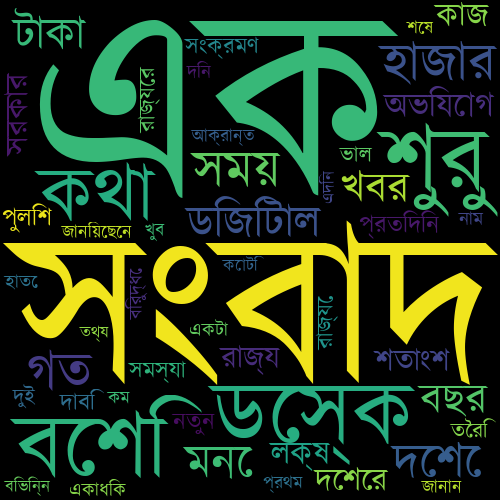